<a href="https://colab.research.google.com/github/jazaineam1/Perdida/blob/main/Ejercicio_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
!pip install lazypredict

In [66]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import warnings
from imblearn.over_sampling import SMOTE
from lazypredict.Supervised import LazyClassifier

# Configuración de matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

# Configuración de warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Habilitar inline plotting para Jupyter Notebooks
%matplotlib inline


In [2]:
data=pd.read_csv("/content/Proyecto de grado base seguros.csv",header=0 , sep=";")
print(data.shape)
display(data)


(6520, 102)


,ID,FACTOR,dpto,mpio,nom_dpto,nom_mpio,codane,ruralidad,pers_conform_hogar,Total_ Hombres,Total_ Mujeres,edad 0 a 17,edad 18 a mas,sexo,edad,Tipo de vivienda,estrato,la vivienda ocupada por este hogar,propietarios de vehiculos,Numero vehiculos hogar,propietarios de motos,Numero motos hogar,Tienen negocio o empresa,Tienen ahorros,Los ahorros son utilizados para :,Tienen creditos,Los creditos son utilizados para:,Una prima de seguros,Una exclusión en un seguro,Un deducible de un seguro,Una reclamación de un seguro,Una preexistencia en un seguro,Tiene pensado adquirir un seguro,Seguro de Vida,Seguro exequial,Seguro de accidentes escolares,Seguro de accidentes personales,EPS - POS,Plan complementario al POS o medicina prepagada,Seguro educativo,Seguro de incendio y terremoto - Hogar,Seguro de incendio y terremoto - Negocio,Seguro de desempleo,ARL,Seguro agropecuario,SOAT,Seguro de Automóvil (Carro o moto),Responsabilidad civil extracontractual,Otro,Ninguno,Es el tomador o beneficiario de Seguro de vida,seguro estuvo atada a la adquisición de un crédito,Adquirio seguro voluntariamente,vigencia del seguro (años),Es el tomador o beneficiario de Seguro de exequial,seguro estuvo atada a la adquisición de un crédito.1,Adquirio seguro voluntariamente.1,vigencia del seguro (años).1,Es el tomador o beneficiario de Seguro accidentes personales,seguro estuvo atada a la adquisición de un crédito.2,Adquirio seguro voluntariamente.2,vigencia del seguro (años).2,Es el tomador o beneficiario de Seguro educativo,vigencia del seguro (años).3,Es el tomador o beneficiario de Seguro hogar,Adquirio seguro voluntariamente.3,vigencia del seguro (años).4,Es el tomador o beneficiario de Seguro negocio,seguro estuvo atada a la adquisición de un crédito.3,Adquirio seguro voluntariamente.4,vigencia del seguro (años).5,Es el tomador o beneficiario de Seguro desempleo,seguro estuvo atada a la adquisición de un crédito.4,Adquirio seguro voluntariamente.5,vigencia del seguro (años).6,Es el tomador o beneficiario de Seguro agropecuario,seguro estuvo atada a la adquisición de un crédito.5,Adquirio seguro voluntariamente.6,vigencia del seguro (años).7,Es el tomador o beneficiario de automovil,seguro estuvo atada a la adquisición de un crédito.6,Adquirio seguro voluntariamente.7,vigencia del seguro (años).8,Es el tomador o beneficiario de Seguro responsabilidad civil,vigencia del seguro (años).9,Es el tomador o beneficiario de Seguro otro,seguro estuvo atada a la adquisición de un crédito.7,Adquirio seguro voluntariamente.8,vigencia del seguro (años).10,ha tenido un seguro,vida,exequial,accidentes personales,seguro educativo,seguro hogar,seguro negocio,seguro desempleo,seguro agropecuario,seguro automovil,seguro Responsabilidad civil extracontractual,Otros seguros,Evento que afecto su economia
0,113734,"4,62",1,1,ANTIOQUIA,MEDELLÍN,5001,Ciudades y aglomeraciones,5,2,3,1,4,2,49,2,3,3,2,NaN,2,NaN,2,2,NaN,1,1.0,1,2,2,1,2,2,1,1,1,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1.0,2.0,1.0,3.0,1.0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113735,"1,85",1,1,ANTIOQUIA,MEDELLÍN,5001,Ciudades y aglomeraciones,2,1,1,0,2,1,47,1,3,1,2,NaN,2,NaN,2,2,NaN,1,7.0,1,2,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,2.0,2.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,113736,"3,69",1,1,ANTIOQUIA,MEDELLÍN,5001,Ciudades y aglomeraciones,4,1,3,1,3,2,63,1,2,1,2,NaN,2,NaN,1,2,NaN,1,7.0,2,2,2,2,2,2,1,1,1,2,1,2,2,2,2,2,1,2,2,2,2,2,2,1.0,1.0,1.0,11.0,2.0,2.0,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,113737,"4,62",1,1,ANTIOQUIA,MEDELLÍN,5001,Ciudades y aglomeraciones,5,1,4,2,3,

In [102]:
variables_seleccionadas=['nom_dpto',
'nom_mpio',
'ruralidad',
'pers_conform_hogar',
'Total_ Hombres',
'Total_ Mujeres',
'edad 0 a 17',
'edad 18 a mas',
'sexo',
'edad',
'estrato',
'propietarios de vehiculos',
'propietarios de motos',
'Tienen negocio o empresa ',
'Tienen ahorros',
'Tiene pensado adquirir un seguro',
# 'Seguro de Vida',
# 'Seguro exequial',
# 'Seguro de accidentes escolares',
# 'Seguro educativo',
# 'Seguro de incendio y terremoto - Hogar',
# 'Seguro de incendio y terremoto - Negocio',
# 'Seguro agropecuario',
# 'Seguro de Automóvil (Carro o moto)',
# 'Responsabilidad civil extracontractual',
# 'Otro'
]

In [103]:
tipos=['str',
'str',
'str',
'int',
'int',
'int',
'int',
'int',
'str',
'int',
'str',
'str',
'str',
'str',
'str',
'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str',
# 'str'
]

In [104]:
data_var=data[variables_seleccionadas]

In [105]:
data_var['Tiene pensado adquirir un seguro'].value_counts()

Tiene pensado adquirir un seguro
2    6021
1     499
Name: count, dtype: int64

In [106]:
tipo_conversion = dict(zip(variables_seleccionadas, tipos))
data_var = data_var.astype(tipo_conversion)

In [107]:
data_var['proporcion mujeres']=data_var['Total_ Mujeres']/data_var['pers_conform_hogar']
data_var['proporcion mayores']=data_var['edad 18 a mas']/data_var['pers_conform_hogar']

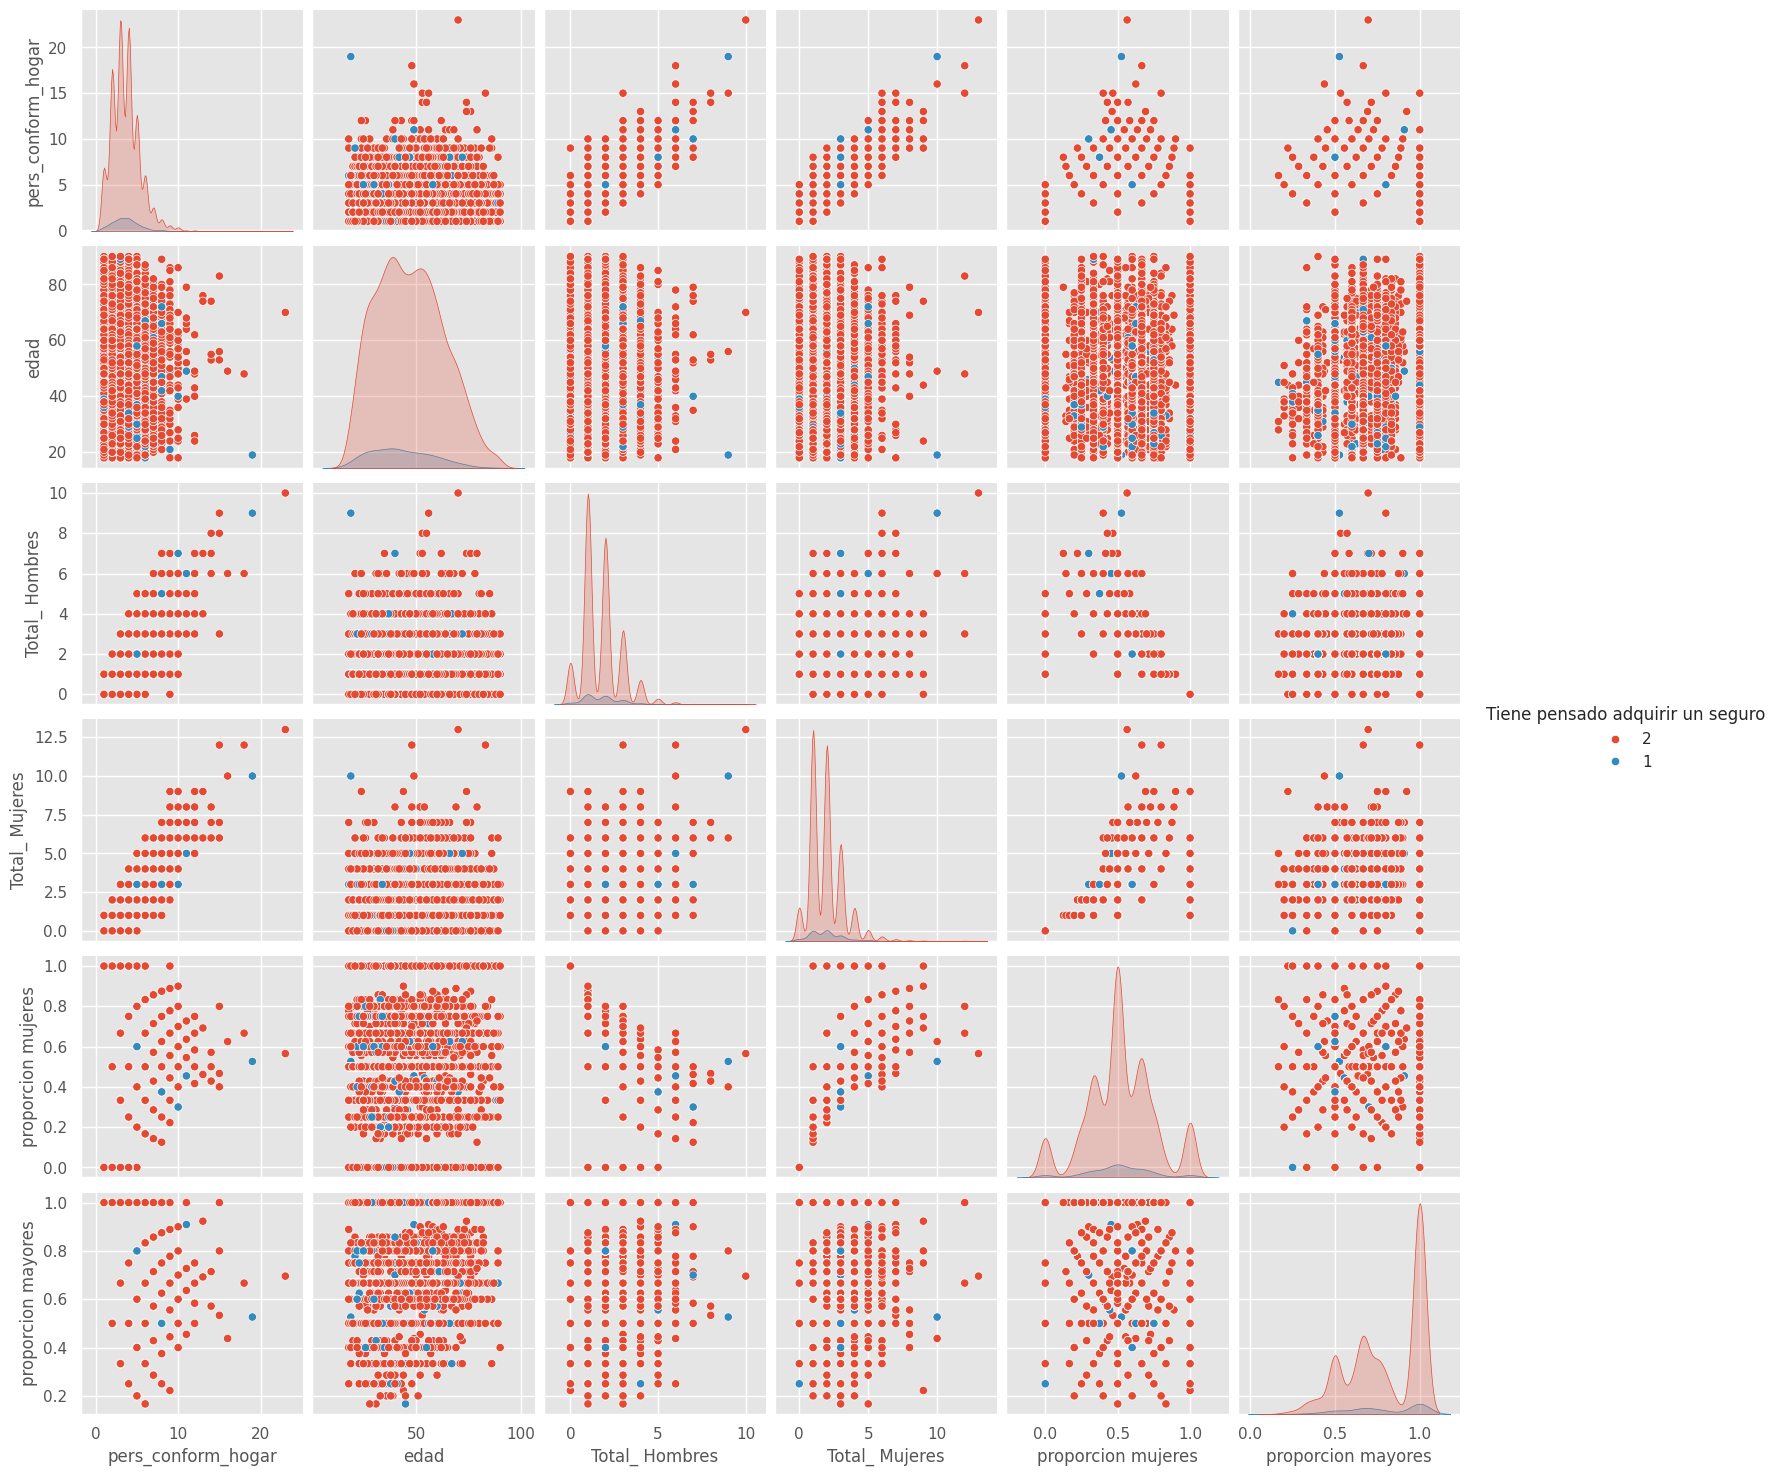

In [41]:
sns.pairplot(data_var[['pers_conform_hogar','edad','Total_ Hombres',
'Total_ Mujeres','Tiene pensado adquirir un seguro', 'proporcion mujeres','proporcion mayores']],hue="Tiene pensado adquirir un seguro", diag_kind="kde")

In [108]:
data_var[['pers_conform_hogar','edad','Total_ Hombres',
'Total_ Mujeres','Tiene pensado adquirir un seguro', 'proporcion mujeres','proporcion mayores']].groupby('Tiene pensado adquirir un seguro').mean()

,pers_conform_hogar,edad,Total_ Hombres,Total_ Mujeres,proporcion mujeres,proporcion mayores
Tiene pensado adquirir un seguro,,,,,,
1,3.72,43.13,1.79,1.92,0.51,0.79
2,3.66,47.14,1.74,1.93,0.52,0.80


In [109]:
#1 es si
#2 es no

In [110]:
t_sexo=pd.crosstab(data_var['Tiene pensado adquirir un seguro'],data_var['sexo'])
t_sexo

sexo,1,2
Tiene pensado adquirir un seguro,,
1,250,249
2,2509,3512


<Axes: xlabel='Tiene pensado adquirir un seguro', ylabel='count'>

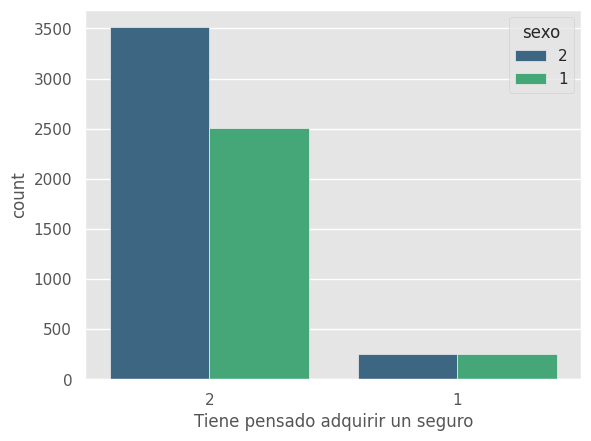

In [111]:
sns.countplot(data=data_var, x='Tiene pensado adquirir un seguro', hue='sexo', palette='viridis')


In [112]:
t_rura=pd.crosstab(data_var['Tiene pensado adquirir un seguro'],data_var['ruralidad'])
t_rura

ruralidad,Ciudades y aglomeraciones,Intermedio,Rural,Rural disperso
Tiene pensado adquirir un seguro,,,,
1,348,60,40,51
2,4049,828,548,596


In [113]:
df_string=data_var.drop('Tiene pensado adquirir un seguro',axis=1).select_dtypes('O')
df_string_dummi=pd.get_dummies(df_string, drop_first=True)
df_string_dummi.shape

(6520, 124)

In [114]:
df_cuanti=data_var.select_dtypes([int,float])
df_cuanti

,pers_conform_hogar,Total_ Hombres,Total_ Mujeres,edad 0 a 17,edad 18 a mas,edad,proporcion mujeres,proporcion mayores
0,5,2,3,1,4,49,0.60,0.80
1,2,1,1,0,2,47,0.50,1.00
2,4,1,3,1,3,63,0.75,0.75
3,5,1,4,2,3,56,0.80,0.60
4,3,1,2,1,2,40,0.67,0.67
...,...,...,...,...,...,...,...,...
6515,7,4,3,2,5,65,0.43,0.71
6516,3,1,2,1,2,31,0.67,0.67
6517,3,2,1,1,2,25,0.33,0.67
6518,4,2,2,1,3,55,0.50,0.75


In [115]:
y=pd.DataFrame()
y['Tiene pensado adquirir un seguro']=np.where(data_var['Tiene pensado adquirir un seguro']=="1",1,0)
y.value_counts()

Tiene pensado adquirir un seguro
0                                   6021
1                                    499
Name: count, dtype: int64

In [116]:
X=pd.concat([df_cuanti,df_string_dummi],axis=1)
X

,pers_conform_hogar,Total_ Hombres,Total_ Mujeres,edad 0 a 17,edad 18 a mas,edad,proporcion mujeres,proporcion mayores,nom_dpto_ATLÁNTICO,"nom_dpto_BOGOTÁ, D. C.",nom_dpto_BOLÍVAR,nom_dpto_BOYACÁ,nom_dpto_CALDAS,nom_dpto_CAQUETÁ,nom_dpto_CAUCA,nom_dpto_CHOCÓ,nom_dpto_CUNDINAMARCA,nom_dpto_CÓRDOBA,nom_dpto_HUILA,nom_dpto_LA GUAJIRA,nom_dpto_MAGDALENA,nom_dpto_META,nom_dpto_NARIÑO,nom_dpto_NORTE DE SANTANDER,nom_dpto_QUINDÍO,nom_dpto_RISARALDA,nom_dpto_SANTANDER,nom_dpto_SUCRE,nom_dpto_TOLIMA,nom_dpto_VALLE DEL CAUCA,nom_mpio_ALCALÁ,nom_mpio_ANGOSTURA,nom_mpio_ARMENIA,nom_mpio_BARRANQUILLA,nom_mpio_BELLO,nom_mpio_BELÉN,"nom_mpio_BOGOTÁ, D.C.",nom_mpio_BOLÍVAR,nom_mpio_BUCARAMANGA,nom_mpio_BUENOS AIRES,nom_mpio_CAICEDONIA,nom_mpio_CALARCÁ,nom_mpio_CALDAS,nom_mpio_CALI,nom_mpio_CARTAGENA DE INDIAS,nom_mpio_CAUCASIA,nom_mpio_CHINCHINÁ,nom_mpio_CIRCASIA,nom_mpio_CIÉNAGA,nom_mpio_COROZAL,nom_mpio_CÓMBITA,nom_mpio_DAGUA,nom_mpio_DUITAMA,nom_mpio_EL DOVIO,nom_mpio_EL TAMBO,nom_mpio_ENVIGADO,nom_mpio_FLANDES,nom_mpio_FLORENCIA,nom_mpio_FLORIDA,nom_mpio_FREDONIA,nom_mpio_FRESNO,nom_mpio_GINEBRA,nom_mpio_GIRARDOT,nom_mpio_GUAMAL,nom_mpio_LA UNIÓN,nom_mpio_LA VICTORIA,nom_mpio_LEBRIJA,nom_mpio_LOS PALMITOS,nom_mpio_MALAMBO,nom_mpio_MEDELLÍN,nom_mpio_MONTELÍBANO,nom_mpio_MONTERÍA,nom_mpio_MORELIA,nom_mpio_NECHÍ,nom_mpio_NECOCLÍ,nom_mpio_NEIVA,nom_mpio_PALMIRA,nom_mpio_PAMPLONA,nom_mpio_PATÍA,nom_mpio_PEREIRA,nom_mpio_PITALITO,nom_mpio_PLATO,nom_mpio_POPAYÁN,nom_mpio_PUERTO GAITÁN,nom_mpio_QUIBDÓ,nom_mpio_RAMIRIQUÍ,nom_mpio_RICAURTE,nom_mpio_ROVIRA,nom_mpio_SAMANÁ,nom_mpio_SAN ANDRÉS DE TUMACO,nom_mpio_SAN BENITO ABAD,nom_mpio_SAN GIL,nom_mpio_SAN JUAN DE ARAMA,nom_mpio_SAN JUAN DE URABÁ,nom_mpio_SAN JUAN DEL CESAR,nom_mpio_SAN PEDRO DE CARTAGO,nom_mpio_SAN SEBASTIÁN DE BUENAVISTA,nom_mpio_SANTA MARTA,nom_mpio_SANTA ROSA DE OSOS,nom_mpio_SANTANDER DE QUILICHAO,nom_mpio_SANTIAGO DE TOLÚ,nom_mpio_SARDINATA,nom_mpio_SEVILLA,nom_mpio_SOACHA,nom_mpio_TADÓ,nom_mpio_TARAZÁ,nom_mpio_TESALIA,nom_mpio_TIBÚ,nom_mpio_TULUÁ,nom_mpio_TUNJA,nom_mpio_TURBANÁ,nom_mpio_TÁMESIS,nom_mpio_TÚQUERRES,nom_mpio_VILLA DE SAN DIEGO DE UBATÉ,nom_mpio_VILLAMARÍA,nom_mpio_VILLANUEVA,nom_mpio_VILLAVICENCIO,nom_mpio_YARUMAL,ruralidad_Intermedio,ruralidad_Rural,ruralidad_Rural disperso,sexo_2,estrato_2,estrato_3,estrato_4,estrato_5,estrato_6,estrato_7,propietarios de vehiculos_2,propietarios de motos_2,Tienen negocio o empresa _2,Tienen ahorros_2
0,5,2,3,1,4,49,0.60,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,True,True
1,2,1,1,0,2,47,0.50,1.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,True
2,4,1,3,1,3,63,0.75,0.75,False,F

In [117]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Crear el LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [118]:

models, predictions = clf.fit(X_train_smote, X_test, y_train_smote, y_test)


 97%|█████████▋| 28/29 [00:31<00:01,  1.32s/it]

[LightGBM] [Info] Number of positive: 4817, number of negative: 4817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 644
[LightGBM] [Info] Number of data points in the train set: 9634, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:32<00:00,  1.11s/it]


In [119]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
Perceptron                         0.64               0.58     0.58      0.72   
LinearDiscriminantAnalysis         0.80               0.55     0.55      0.83   
RidgeClassifierCV                  0.80               0.55     0.55      0.83   
RidgeClassifier                    0.80               0.55     0.55      0.83   
LinearSVC                          0.80               0.55     0.55      0.83   
LogisticRegression                 0.78               0.54     0.54      0.82   
LabelSpreading                     0.84               0.54     0.54      0.85   
LabelPropagation                   0.84               0.54     0.54      0.85   
RandomForestClassifier             0.83               0.54     0.54      0.85   
CalibratedClassifierCV             0.75               0.54     0.54      0.80   
GaussianNB                  

In [90]:
pip install xgboost imbalanced-learn


In [97]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
# Calcular scale_pos_weight
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Crear el modelo XGBoost
model = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo
model.fit(X_train_smote, y_train_smote)

# Hacer predicciones
y_pred = model.predict(X_test)

In [121]:
scale_pos_weight

12.072681704260651

In [122]:
y_test.value_counts()

Tiene pensado adquirir un seguro
0                                   1204
1                                    100
Name: count, dtype: int64

In [123]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[980 224]
 [ 73  27]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1204
           1       0.11      0.27      0.15       100

    accuracy                           0.77      1304
   macro avg       0.52      0.54      0.51      1304
weighted avg       0.87      0.77      0.81      1304

